In [1]:
#iris 데이터의 특징값
from sklearn.datasets import load_iris
iris = load_iris()
N = 100 #앞의 10송이만 선택
X = iris.data[:N, :2] #꽃받침 길이와 꽃받침 폭만 선택


Bad key "text.kerning_factor" on line 4 in
C:\Users\WonjunChun\Anaconda3\envs\venv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


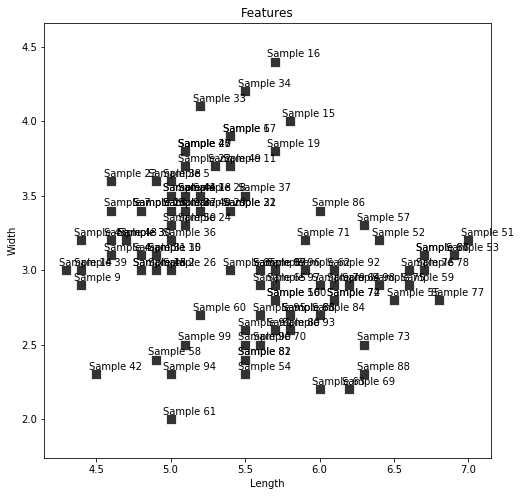

In [2]:
#데이터를 좌표 평면 상에 표현해보기
import pandas as pd
import pystan
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(8, 8))
ax = sns.scatterplot(0, 1, data=pd.DataFrame(X), s=100, color=".2", marker="s")
for i in range(N):
    ax.text(X[i, 0] - 0.05, X[i, 1] + 0.03, "Sample {}".format(i+1))
plt.xlabel("Length")
plt.ylabel("Width")
plt.title("Features")
plt.axis("equal")
plt.show()

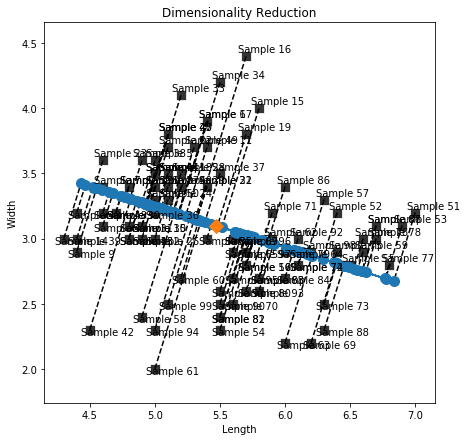

In [3]:
#scikit-learn을 활용한 주성분 분석
from sklearn.decomposition import PCA

pca1 = PCA(n_components=1)
X_low = pca1.fit_transform(X)
X2 = pca1.inverse_transform(X_low)

plt.figure(figsize=(7, 7))
ax = sns.scatterplot(0, 1, data=pd.DataFrame(X), s=100, color=".2", marker="s")
for i in range(N):
    d = 0.03 if X[i, 1] > X2[i, 1] else -0.04
    ax.text(X[i, 0] - 0.065, X[i, 1] +d, "Sample {}".format(i+1))
    plt.plot([X[i, 0], X2[i, 0]], [X[i, 1], X2[i, 1]], "k--")
plt.plot(X2[:, 0], X2[:, 1], "o-", markersize=10)
plt.plot(X[:, 0].mean(), X[:, 1].mean(), markersize=10, marker="D")
plt.grid(False)
plt.xlabel("Length")
plt.ylabel("Width")
plt.title("Dimensionality Reduction")
plt.axis("equal")
plt.show()